In [17]:
import nbimporter
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo, list_available_datasets
from keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
import seaborn as sns
import random
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix












import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.optimizers.legacy import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
import warnings
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix 
import warnings

**Get Data**

In [34]:
df = pd.read_csv("../mushroom/agaricus-lepiota.data")
mushroom = fetch_ucirepo(id=73)

**Generate Usable/Mapped Dataset**

In [35]:
mappings = {
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

df.columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',  'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',  'ring-type',  'spore-print-color', 'population',  'habitat']

#apply mappings to the dataframe
def map_features(df, mappings):
    for column in df.columns:
        if column in mappings:
            df[column] = df[column].map(mappings[column]).fillna(df[column])
    return df

# Apply the mappings to the dataframe
df_mapped = map_features(df, mappings)
df_mapped.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
1,e,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
2,p,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
3,e,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
4,e,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses


In [36]:
columns = ['veil-type', 'odor', 'spore-print-color']
df_mapped.drop(columns, inplace=True, axis=1)

df_mapped.head()

,class,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,population,habitat
0,e,convex,smooth,yellow,bruises,free,close,broad,black,enlarging,club,smooth,smooth,white,white,white,one,pendant,numerous,grasses
1,e,bell,smooth,white,bruises,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,white,one,pendant,numerous,meadows
2,p,convex,scaly,white,bruises,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,white,one,pendant,scattered,urban
3,e,convex,smooth,gray,no,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,white,one,evanescent,abundant,grasses
4,e,convex,scaly,yellow,bruises,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,white,one,pendant,numerous,grasses


**Check for and remove missing values**

In [37]:
for column in df_mapped.columns:
    if df_mapped[column].isnull().any():
        print(f"Column {column} has missing values")
        df_mapped = df_mapped[df_mapped[column].notnull()]
        
df_mapped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8123 non-null   object
 1   cap-shape                 8123 non-null   object
 2   cap-surface               8123 non-null   object
 3   cap-color                 8123 non-null   object
 4   bruises                   8123 non-null   object
 5   gill-attachment           8123 non-null   object
 6   gill-spacing              8123 non-null   object
 7   gill-size                 8123 non-null   object
 8   gill-color                8123 non-null   object
 9   stalk-shape               8123 non-null   object
 10  stalk-root                8123 non-null   object
 11  stalk-surface-above-ring  8123 non-null   object
 12  stalk-surface-below-ring  8123 non-null   object
 13  stalk-color-above-ring    8123 non-null   object
 14  stalk-color-below-ring  

In [38]:
df = df_mapped

**DATA VISUALIZATION**

Frequency Bar Charts

In [39]:
# columns_to_plot = df.columns[:-1]
# 
# # Loop through columns and create bar charts
# for col in columns_to_plot:
#     df[col].value_counts().plot(kind='bar')
#     plt.title(f"Frequency of {col}")
#     plt.xlabel(col)
#     plt.ylabel("Count")
#     plt.show()

Generate Countplots to View Data correlations

In [40]:
# categorical_cols = [col for col in df_mapped.columns if df_mapped[col].dtype == 'object']
# 
# # Loop through the categorical features
# for col in categorical_cols:
#     sns.countplot(x = col, hue="class", data=df_mapped) 
#     plt.title(f"Distribution of {col} by Class")
#     plt.show()

Distribution of Target Classes

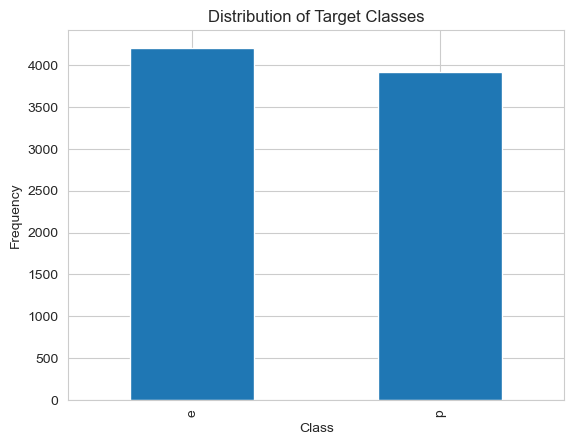

In [41]:
df['class'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

**One-hot Encoding**

In [42]:
y = df_mapped['class'].map({'e': 1.0, 'p': 0.0})

# Drop the 'class' column 
X = df_mapped.drop(['class'], axis=1)
# Initialize
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)
feature_names = encoder.get_feature_names_out(X.columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)

y_df = pd.DataFrame(y).reset_index(drop=True)

df_encoded = pd.concat([y_df, X_encoded_df], axis=1)

df_encoded.head()

,class,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Split dataset - in order to prevent data leakage**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

**Logistic Regression Testing**

In [44]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9981538461538462
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       772
         1.0       1.00      1.00      1.00       853

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[770   2]
 [  1 852]]


Text(0.5, 427.9555555555555, 'Predicted')

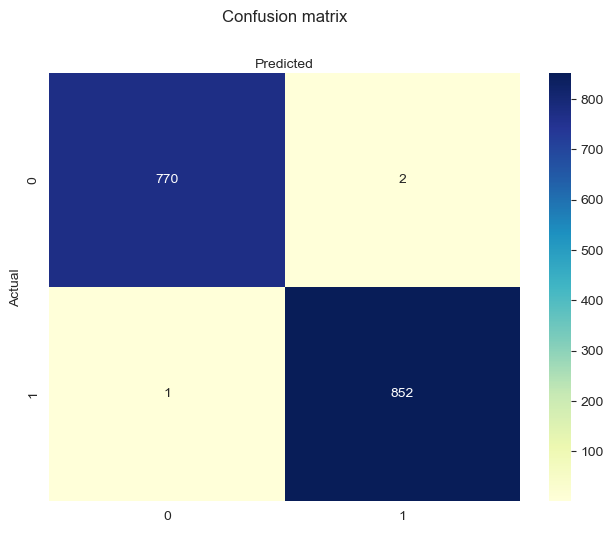

In [45]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

**ANN Testing**

In [46]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer 
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (single neuron for binary classification)

optimizer = Adam(learning_rate=0.001) # Adjust the learning rate as needed
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to class labels

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Epoch 1/10
204/204 [==============================] - 0s 1ms/step - loss: 0.2505 - accuracy: 0.8989 - val_loss: 0.0590 - val_accuracy: 0.9858
Epoch 2/10
204/204 [==============================] - 0s 492us/step - loss: 0.0336 - accuracy: 0.9926 - val_loss: 0.0144 - val_accuracy: 0.9994
Epoch 3/10
204/204 [==============================] - 0s 455us/step - loss: 0.0103 - accuracy: 0.9989 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 4/10
204/204 [==============================] - 0s 443us/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 5/10
204/204 [==============================] - 0s 480us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/10
204/204 [==============================] - 0s 460us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 8.6254e-04 - val_accuracy: 1.0000
Epoch 7/10
204/204 [==============================] - 0s 394us/step - loss: 6.9295e-04 - accuracy: 1.0000 - val_loss: 5.7384e-04 - val

**PCA + K-Fold Cross Validation**

In [15]:
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
accuracies = []  # Store accuracies for each fold

for train_index, val_index in kf.split(X_train_cv):
    X_train_fold, X_val_fold = X_train_cv.iloc[train_index], X_train_cv.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cv.iloc[train_index], y_train_cv.iloc[val_index]

    # Fit PCA on the current training fold
    pca = PCA(n_components=0.95)  # Keep 95% of explained variance
    X_train_fold_pca = pca.fit_transform(X_train_fold) 
    X_val_fold_pca = pca.transform(X_val_fold)

    # Train logistic regression
    log_reg = LogisticRegression(max_iter=10000)
    log_reg.fit(X_train_fold_pca, y_train_fold)

    # Evaluation on the validation fold
    y_pred = log_reg.predict(X_val_fold_pca)
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracies.append(accuracy)

# Average accuracy across folds
avg_accuracy = np.mean(accuracies)
print(f"Average cross-validation accuracy: {avg_accuracy}")

Average cross-validation accuracy: 0.9913827204358382


**Kernel PCA + K-Fold Cross Validation**

In [16]:
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# K-Fold Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)  
accuracies = []  

for train_index, val_index in kf.split(X_train_cv):
    X_train_fold, X_val_fold = X_train_cv.iloc[train_index], X_train_cv.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cv.iloc[train_index], y_train_cv.iloc[val_index]

    # Kernel PCA 
    kpca = KernelPCA(n_components=None, kernel='rbf') 
    X_train_fold_kpca = kpca.fit_transform(X_train_fold) 
    X_val_fold_kpca = kpca.transform(X_val_fold)

    # Logistic Regression
    log_reg = LogisticRegression(max_iter=10000)
    log_reg.fit(X_train_fold_kpca, y_train_fold)

    # Evaluation
    y_pred = log_reg.predict(X_val_fold_kpca)
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracies.append(accuracy)

# Calculate average accuracy across folds
avg_accuracy = np.mean(accuracies)
print(f"Average cross-validation accuracy: {avg_accuracy}")

Average cross-validation accuracy: 0.9858426008171965
